In [41]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


df = pd.read_csv('mlb-umpire-scorecard.csv')
# Getting a look at the data making any changes neccessary
# print(df.umpire.value_counts())

#Change column values that are decimals from object to a float for analysis
df['accuracy'] = pd.to_numeric(df['accuracy'], errors='coerce')
df['consistency'] = pd.to_numeric(df['consistency'], errors='coerce') 
df['favor_home'] = pd.to_numeric(df['favor_home'],errors='coerce')

#Creating a year column to see stats over years.
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['year'] = pd.to_numeric(df['year'], errors='coerce')
#Filling null values with 0 as placeholder
df = df.fillna(0)

print(df.dtypes)

# This data set has 124 different upmire's games tracked.
# I chose not to use every single umpire for our data because they are not all represented equally.
# I have chosen the top 5 umpires who are represented in this dataset.
# Main Objective is to understand if there is a correlation between umpire and home team runs scored.

id                                       int64
date                            datetime64[ns]
umpire                                  object
home                                    object
away                                    object
home_team_runs                           int64
away_team_runs                           int64
pitches_called                          object
incorrect_calls                         object
expected_incorrect_calls                object
correct_calls                           object
expected_correct_calls                  object
correct_calls_above_expected            object
accuracy                               float64
expected_accuracy                       object
accuracy_above_expected                 object
consistency                            float64
favor_home                             float64
total_run_impact                        object
year                                     int32
dtype: object


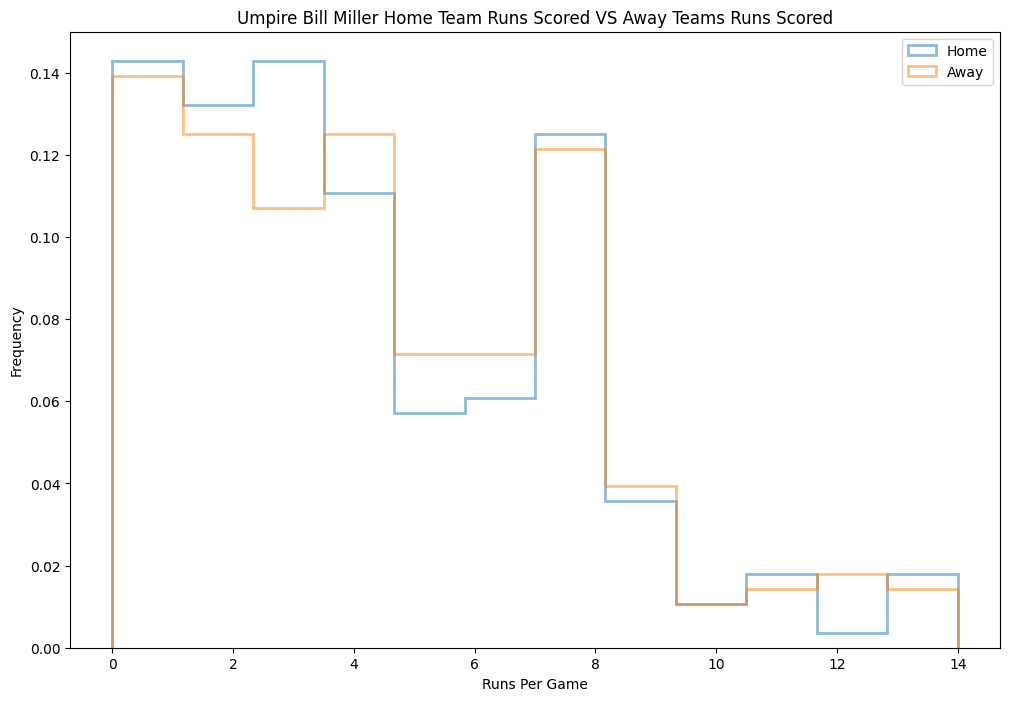

Umpire Bill Miller home team run average is 4 while the away teams run average is 4
Highest amount of runs scored by a home team while Adam Hamari is umpire is 14
While away teams highest amount of runs scored in a single game is 14


In [42]:
# The top five umpires with the most games recorded in this dataset all have over 230 games recorded.

#Made a dataset for each umpire we want to analyze

df_bill = df.loc[df['umpire'] == 'Bill Miller']
df_adam = df.loc[df['umpire'] == 'Adam Hamari']
df_ted = df.loc[df['umpire'] == 'Ted Barrett']
df_dan = df.loc[df['umpire'] == 'Dan Bellino']
df_marvin = df.loc[df['umpire'] == 'Marvin Hudson']

#First question: Does the home team score more runs more often than the away team?
#In other words do these umpires favor the home team?

plt.figure(figsize=(12, 8))          
plt.hist(df_bill.home_team_runs, density=True, histtype='step', bins=12, alpha=0.5, label="Home", linewidth=2)
plt.hist(df_bill.away_team_runs, density=True, histtype='step', bins=12, alpha=0.5, label="Away", linewidth=2)
plt.legend()
plt.title('Umpire Bill Miller Home Team Runs Scored VS Away Teams Runs Scored')
plt.xlabel("Runs Per Game")
plt.ylabel("Frequency")
plt.show()

print("Umpire Bill Miller home team run average is " + str(round(df_bill.home_team_runs.mean())) + " while the away teams run average is " + str(round(df_bill.away_team_runs.mean())))
print("Highest amount of runs scored by a home team while Adam Hamari is umpire is " + str(df_bill.home_team_runs.max()))
print("While away teams highest amount of runs scored in a single game is " + str(df_bill.away_team_runs.max()))
#Interpretation:
#The spread of runs is pretty even home and away for Bill Miller.
#The average for both home and away teams is 4, the max amount of runs scored by home and away is also even at 14.
#Conclusion there does not seem to be a correlation with Bill Miller umpiring the home teams outscoring away teams.

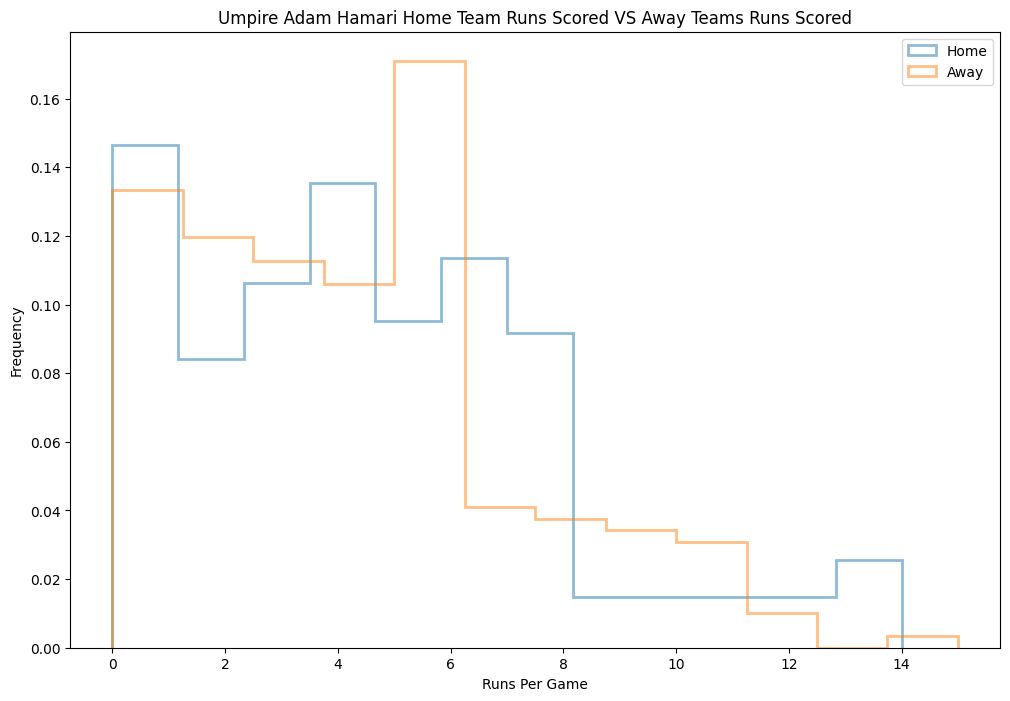

Umpire Adam Hamari home team run average is 5 while the away teams run average is 4
Highest amount of runs scored by a home team while Adam Hamari is umpire is 14
While away teams highest amount of runs scored in a single game is 15


In [43]:
plt.figure(figsize=(12, 8))          
plt.hist(df_adam.home_team_runs, density=True, histtype='step', bins=12, alpha=0.5, label="Home", linewidth=2)
plt.hist(df_adam.away_team_runs, density=True, histtype='step', bins=12, alpha=0.5, label="Away", linewidth=2)
plt.legend()
plt.title('Umpire Adam Hamari Home Team Runs Scored VS Away Teams Runs Scored')
plt.xlabel("Runs Per Game")
plt.ylabel("Frequency")
plt.show()
print("Umpire Adam Hamari home team run average is " + str(round(df_adam.home_team_runs.mean())) + " while the away teams run average is " + str(round(df_adam.away_team_runs.mean())))
print("Highest amount of runs scored by a home team while Adam Hamari is umpire is " + str(df_adam.home_team_runs.max()))
print("While away teams highest amount of runs scored in a single game is " + str(df_adam.away_team_runs.max()))
#Interpretation:
#The average of home teams runs scored is 5 while away teams are scoring 4, so the home team on average scores 1 more run than the away team.
#The max amount runs scored by home teams is 14 while away is 15.
#The average weighs more in this analysis because it tells us that the home team on average outscores there opponents when Adam Hamari is the home plate umpire.

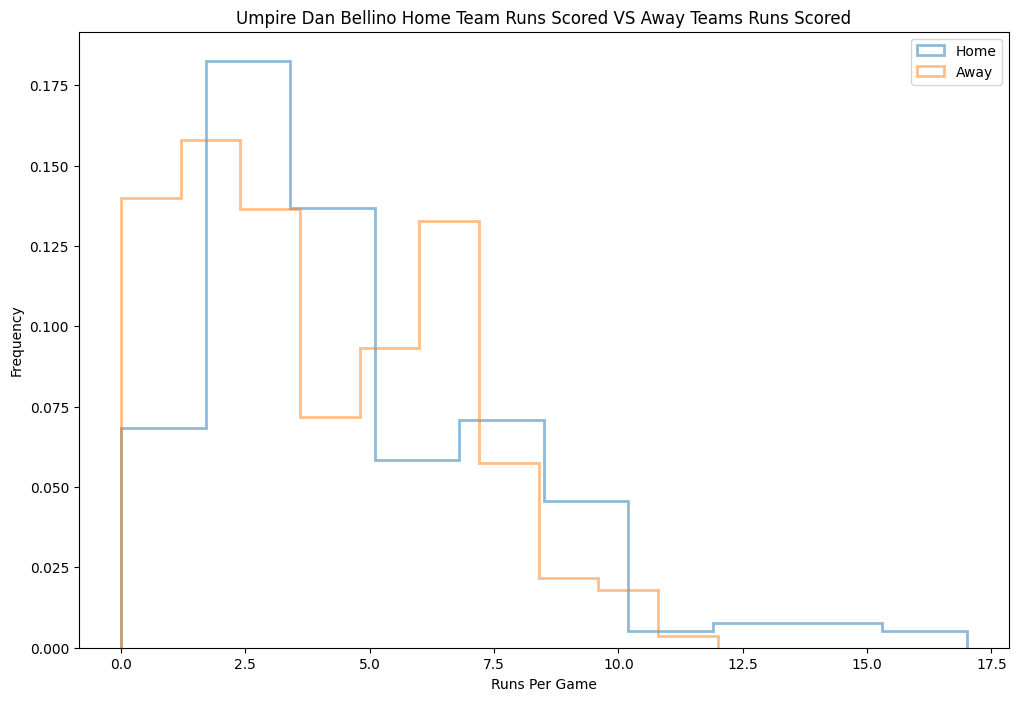

Umpire Dan Bellino home team run average is 5 while the away teams run average is 4
Highest amount of runs scored by a home team while Dan Bellino is umpire is 17
While away teams highest amount of runs scored in a single game is 12


In [44]:
plt.figure(figsize=(12, 8))          
plt.hist(df_dan.home_team_runs, density=True, histtype='step', alpha=0.5, label="Home", linewidth=2)
plt.hist(df_dan.away_team_runs, density=True, histtype='step', alpha=0.5, label="Away", linewidth=2)
plt.legend()
plt.title('Umpire Dan Bellino Home Team Runs Scored VS Away Teams Runs Scored')
plt.xlabel("Runs Per Game")
plt.ylabel("Frequency")
plt.show()
df_dan_home = df_dan.home_team_runs.mean()
df_dan_away = df_dan.away_team_runs.mean()
print("Umpire Dan Bellino home team run average is " + str(round(df_dan_home)) + " while the away teams run average is " + str(round(df_dan_away)))
print("Highest amount of runs scored by a home team while Dan Bellino is umpire is " + str(df_dan.home_team_runs.max()))
print("While away teams highest amount of runs scored in a single game is " + str(df_dan.away_team_runs.max()))
#Interpretation:
#When Dan Bellino is behind the plate home teams are outscoring there opponents 5 to 4 according to the average runs scored by home and away per game.
#The home teams top runs scored in a game is also higher than the away teams 17 to 12.
#With the average being in favor of the home team we can say that on average the home team outscores the away by 1 run.

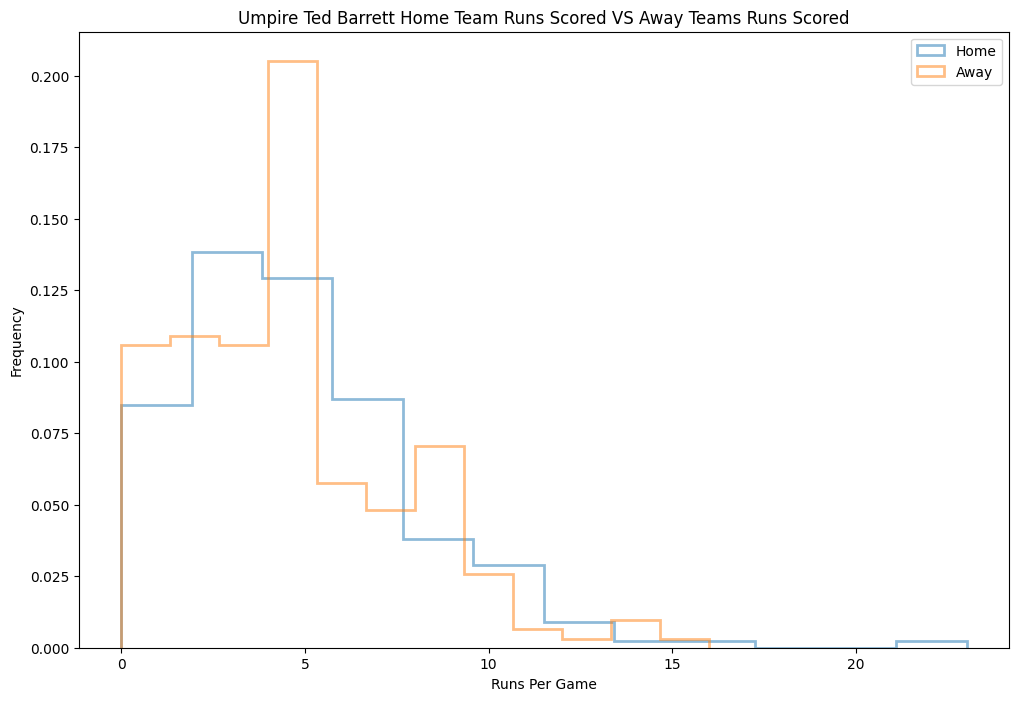

Umpire Ted Barrett home team run average is 5 while the away teams run average is 4
Highest amount of runs scored by a home team while Adam Hamari is umpire is 23
While away teams highest amount of runs scored in a single game is 16


In [45]:
plt.figure(figsize=(12, 8))          
plt.hist(df_ted.home_team_runs, density=True, histtype='step', bins=12, alpha=0.5, label="Home", linewidth=2)
plt.hist(df_ted.away_team_runs, density=True, histtype='step', bins=12, alpha=0.5, label="Away", linewidth=2)
plt.legend()
plt.title('Umpire Ted Barrett Home Team Runs Scored VS Away Teams Runs Scored')
plt.xlabel("Runs Per Game")
plt.ylabel("Frequency")
plt.show()
print("Umpire Ted Barrett home team run average is " + str(round(df_ted.home_team_runs.mean())) + " while the away teams run average is " + str(round(df_ted.away_team_runs.mean())))
print("Highest amount of runs scored by a home team while Adam Hamari is umpire is " + str(df_ted.home_team_runs.max()))
print("While away teams highest amount of runs scored in a single game is " + str(df_ted.away_team_runs.max()))
#For umpire Ted Barret he continues the trend of the homne team averaging more runs than the away team. This dataset might skewed a little bit though.
#We can see that the home team has a lone outlier at 23 runs scored, which could be pushing the home teams run average just above the away team.
#We can see in the histogram that the away team has more games where they scored 5 runs and 9 runs.
#My conclusion is that there is no correlation between Ted Barrett umpiring and the home team scoring more runs than the away team.

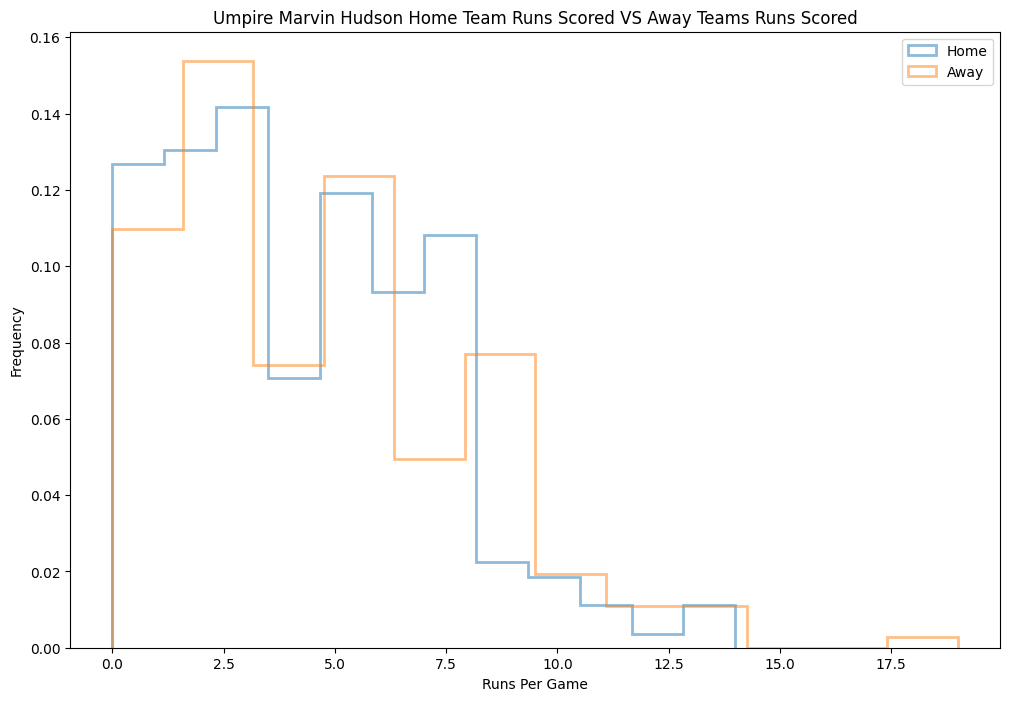

Umpire Marvin Hudson home team run average is 4 while the away teams run average is 5
Highest amount of runs scored by a home team while Adam Hamari is umpire is 14
While away teams highest amount of runs scored in a single game is 19


In [46]:
plt.figure(figsize=(12, 8))          
plt.hist(df_marvin.home_team_runs, density=True, histtype='step', bins=12, alpha=0.5, label="Home", linewidth=2)
plt.hist(df_marvin.away_team_runs, density=True, histtype='step', bins=12, alpha=0.5, label="Away", linewidth=2)
plt.legend()
plt.title('Umpire Marvin Hudson Home Team Runs Scored VS Away Teams Runs Scored')
plt.xlabel("Runs Per Game")
plt.ylabel("Frequency")
plt.show()
print("Umpire Marvin Hudson home team run average is " + str(round(df_marvin.home_team_runs.mean())) + " while the away teams run average is " + str(round(df_marvin.away_team_runs.mean())))
print("Highest amount of runs scored by a home team while Adam Hamari is umpire is " + str(df_marvin.home_team_runs.max()))
print("While away teams highest amount of runs scored in a single game is " + str(df_marvin.away_team_runs.max()))
#Interpretation:
#When Marvin Hudson is the home plate umpire the home teams average runs per game is 4, while the away teams is 5.
#The maximum amount of runs score by a home team is 14 to the opposing away teams 19 run game.
#With both the average runs per game and the max amount of runs scored going in favor of the away teams while Marvin Hudson is the home plate umpire.
#It can be concluded there is clearly no favor of the home team scoring more runs.

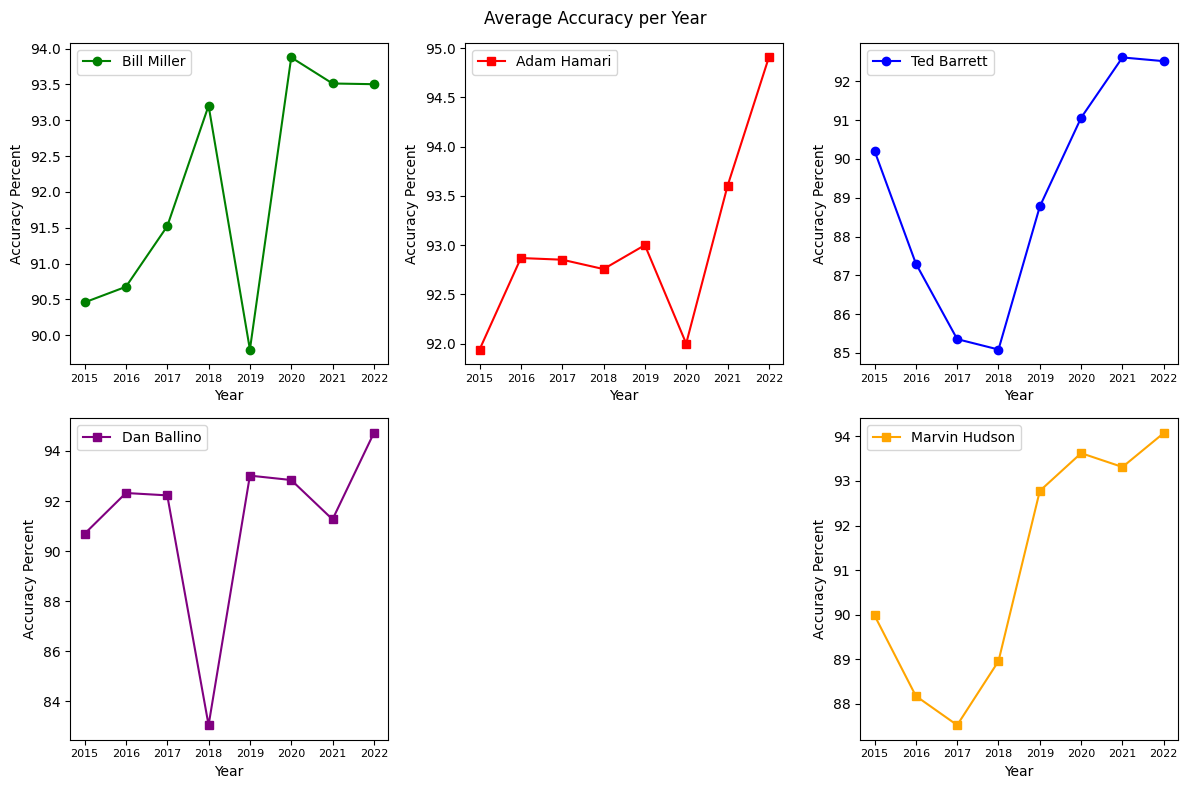

In [47]:
#The next part I will be breaking down the accuracy of each umpires calls.
#Question: Can you visualize and compare each umpires accuracy in 2022?

bill_avg_acc = df_bill.groupby('year')['accuracy'].mean().reset_index()
adam_avg_acc = df_adam.groupby('year')['accuracy'].mean().reset_index()
ted_avg_acc = df_ted.groupby('year')['accuracy'].mean().reset_index()
dan_avg_acc = df_dan.groupby('year')['accuracy'].mean().reset_index()
marvin_avg_acc = df_marvin.groupby('year')['accuracy'].mean().reset_index()


fig, axs = plt.subplots(2, 3, figsize=(12,8))
fig.suptitle('Average Accuracy per Year')
axs[0, 0].plot(bill_avg_acc.year, bill_avg_acc.accuracy, color='green', marker='o', label='Bill Miller')
axs[0, 0].set_xticks(bill_avg_acc.year)
axs[0, 0].set_xticklabels(range(2015,2023), fontsize=8)
axs[0, 0].set_xlabel('Year')
axs[0, 0].get_yticks()
axs[0, 0].set_ylabel('Accuracy Percent')
axs[0, 0].legend(loc='best')

axs[0, 1].plot(adam_avg_acc.year, adam_avg_acc.accuracy, color='red', marker='s', label='Adam Hamari')
axs[0, 1].set_xticks(adam_avg_acc.year)
axs[0, 1].set_xticklabels(range(2015,2023), fontsize=8)
axs[0, 1].set_xlabel('Year')
axs[0, 1].get_yticks()
axs[0, 1].set_ylabel('Accuracy Percent')
axs[0, 1].legend(loc='best')

axs[0, 2].plot(ted_avg_acc.year, ted_avg_acc.accuracy, color='blue', marker='o', label='Ted Barrett')
axs[0, 2].set_xticks(ted_avg_acc.year)
axs[0, 2].set_xticklabels(range(2015,2023), fontsize=8)
axs[0, 2].set_xlabel('Year')
axs[0, 2].get_yticks()
axs[0, 2].set_ylabel('Accuracy Percent')
axs[0, 2].legend(loc='best')

axs[1, 0].plot(dan_avg_acc.year, dan_avg_acc.accuracy, color='purple', marker='s', label='Dan Ballino')
axs[1, 0].set_xticks(dan_avg_acc.year)
axs[1, 0].set_xticklabels(range(2015,2023), fontsize=8)
axs[1, 0].set_xlabel('Year')
axs[1, 0].get_yticks()
axs[1, 0].set_ylabel('Accuracy Percent')
axs[1, 0].legend(loc='best')


axs[1, 2].plot(marvin_avg_acc.year, marvin_avg_acc.accuracy, color='orange', marker='s', label='Marvin Hudson')
axs[1, 2].set_xticks(marvin_avg_acc.year)
axs[1, 2].set_xticklabels(range(2015,2023), fontsize=8)
axs[1, 2].set_xlabel('Year')
axs[1, 2].get_yticks()
axs[1, 2].set_ylabel('Accuracy Percent')
axs[1,1].axis('off')

plt.legend(loc='best')
plt.tight_layout()
plt.show()
#Analysis:
#Through observation of the plots below we can confidently conclude that each umpire increased the accuracy of there calls as their respective
# careers progresseed. Each of them started out roughly at 90 percent accuracy in 2015 and in 2022 each of them saw an increase.
# Dan Ballino had the biggest increase starting at 90.5 and ending 2022 at a 94.5 percent accuracy.

In [48]:
# Extract the highest accuracy percentages

def get_top(data, column_name, n=1):
    if column_name not in data.columns:
        print(f"ERROR: column ' {column_name}' not found in DF.")
        return pd.Series([])
    if not isinstance(n, int) or n <=0:
        print("Error: n must be a positive integer.")
        return pd.Series([])
    return data[column_name].nlargest(n)
print("Below is listed the top 5 umpire accuracies in this dataset, 100 percent is impressive.") 
print(get_top(df, 'accuracy', n=5))


Below is listed the top 5 umpire accuracies in this dataset, 100 percent is impressive.
4       100.0
1270     99.4
1330     99.4
2143     99.4
4531     99.4
Name: accuracy, dtype: float64


In [49]:
#Lets see who had the 100 percent accuracy
df_max = df[df.accuracy == 100.0].set_index('accuracy')
df_name = df_max.loc[max(df_max.index), 'umpire']
print("The highest percentage of this data is " + df_name + " with a perfect 100.0% accuracy")

The highest percentage of this data is Pat Hoberg with a perfect 100.0% accuracy


In [50]:
#Consistancy is important in an umpire, next will see the top 10 most consistent umpires
#we can use the function in the previous cell to find this.
print("Below is a list of the 10 consistency ratings:")
print(get_top(df, 'consistency', n=10))

#Use the same entry to get the names of the 4 100's
df_max2 = df[df.consistency == 100.0].set_index('consistency')
df_name2 = df_max2.loc[max(df_max2.index), 'umpire']
print("Below are the 4 umpires who have a 100.0 for consistency:")
print(df_name2)

Below is a list of the 10 consistency ratings:
104      100.0
2281     100.0
7794     100.0
10054    100.0
144       99.4
1266      99.4
1573      99.3
3363      99.3
8395      99.3
9782      99.3
Name: consistency, dtype: float64
Below are the 4 umpires who have a 100.0 for consistency:
consistency
100.0    Mark Carlson
100.0      James Hoye
100.0    Doug Eddings
100.0    Ryan Blakney
Name: umpire, dtype: object


In [51]:
#Fortunately this dataset has a column labeled favor_home, lets take a look
#Use same function to get the highest values and umpire name from favor_home column
get_top(df, 'favor_home', n=1)
favor = df[df.favor_home == 3.4].set_index('favor_home')
favor_name = favor.loc[max(favor.index), 'umpire']
print("The umpire with the greatest home favored games is " + favor_name + " with a 3.40.")

The umpire with the greatest home favored games is Alex Tosi with a 3.40.
